In [1]:
## file for video segmentation using prompt

In [4]:
from mb_llm.utils import video_to_images
## from mb_ffmpeg.video_ops import VideoOperations ## can use this too for video operations

In [3]:
image_list = video_to_images(video_path="./test_data/test_video.mp4",image_save_path="./test_data/video_images",image_name="0",
                             frame_interval=1,duration=7,image_format="jpg");

Converting video to images:   0%|          | 0/773 [00:00<?, ?it/s]

Converting video to images:  27%|██▋       | 211/773 [00:01<00:05, 112.24it/s]

Video duration reached
Total frames: 773
Current frame: 211
Current time: 7.033333333333333


In [1]:
from PIL import Image
from mb_llm.utils import load_env_file
from mb_rag.chatbot.basic import ModelFactory

load_env_file('./env');


In [2]:
model = ModelFactory('google','gemini-1.5-flash')

/home/malav/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model.invoke_query(query= 'Return bounding boxes of container, for each only one return [xmin,ymin, xmax, ymax]', images = ['./test_data/video_images/0_0005.jpg'])

'[78,183,896,836]'

In [3]:
from mb_rag.utils.bounding_box import BoundingBoxConfig,BoundingBoxProcessor

In [2]:
config = BoundingBoxConfig(
    model_name="gemini-1.5-flash")

In [3]:
processor = BoundingBoxProcessor(config)

/home/malav/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
image_path = './test_data/video_images/0_0005.jpg' 
boxes = processor.generate_bounding_boxes(
    image_path,
    prompt='Return bounding boxes of container, for each only one return [xmin,ymin, xmax, ymax]',
)
print("Generated Bounding Boxes:", boxes)

Generated Bounding Boxes: response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "1) [11 81 998 932]"
              }
            ],
            "role": "model"
          },
          "finish_reason": "STOP",
          "avg_logprobs": -0.5939062342924231
        }
      ],
      "usage_metadata": {
        "prompt_token_count": 279,
        "candidates_token_count": 17,
        "total_token_count": 296
      }
    }),
)


In [5]:
boxes.text

'1) [11 81 998 932]'

In [6]:
sample_boxes = {'container':[10,84,996,928]} #sample bounding boxes

In [7]:
processed_img = processor.add_bounding_boxes(
    image_path,
    sample_boxes,
    color=(0, 255, 0),  # Green color
    thickness=2,
    font_scale=0.5,
    show=False,  # Display the result
    google_bb=True,  # Google's bounding boxes
)

Orignal Bounding Box from GOOGLE BBOX:  [10, 161, 1075, 1781]


In [8]:
processor.save_image(processed_img, "./example_data/output_with_bb.jpg")

In [16]:
import matplotlib.pyplot as plt
from PIL import Image

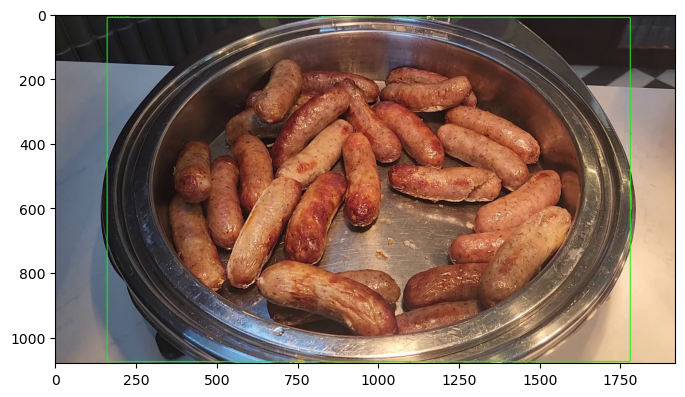

In [17]:
plt.figure(figsize=(8, 8))
plt.imshow(Image.open('./example_data/output_with_bb.jpg'))

In [8]:
## sam2 processor for videos

In [1]:
from mb_llm.segsam2 import VideoPredictor

/home/malav/.local/lib/python3.11/site-packages/torch/cuda/__init__.py:128: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
vid_processor = VideoPredictor('./sam2_hiera_s.yaml','/home/malav/Desktop/segment-anything-2/checkpoints/sam2_hiera_small.pt')

In [3]:
vid_processor.set_inference_state(video_image_folder='./test_data/video_images')

frame loading (JPEG): 100%|██████████| 206/206 [00:06<00:00, 29.63it/s]


/home/malav/.local/lib/python3.11/site-packages/sam2/sam2_video_predictor.py:873: UserWarning: cannot import name '_C' from 'sam2' (/home/malav/.local/lib/python3.11/site-packages/sam2/__init__.py)

Skipping the post-processing step due to the error above. You can still use SAM 2 and it's OK to ignore the error above, although some post-processing functionality may be limited (which doesn't affect the results in most cases; see https://github.com/facebookresearch/segment-anything-2/blob/main/INSTALL.md).
  pred_masks_gpu = fill_holes_in_mask_scores(


1
0


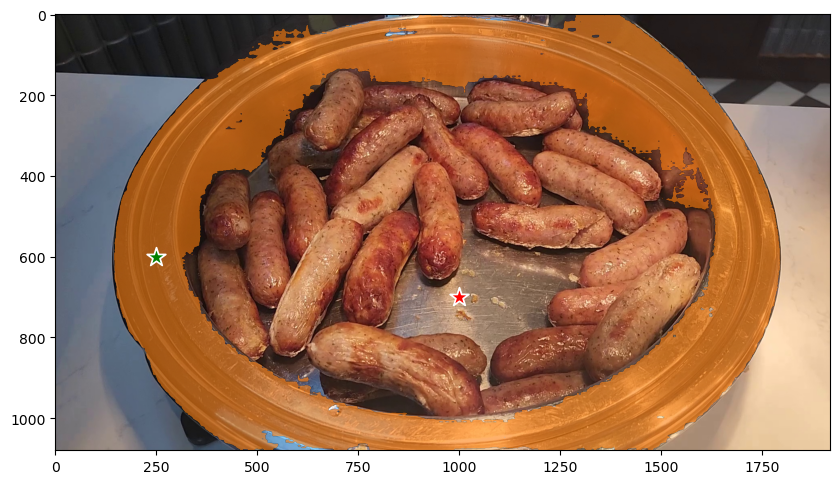

In [4]:
vid_processor.predict_item(bbox=[10, 161, 1075, 1781],points=[[250, 600],[1000,700]],labels=[1,0],frame_idx=0) ## the bbox cordinates are different from google gemini output. check order

propagate in video:   0%|          | 0/206 [00:00<?, ?it/s]/home/malav/.local/lib/python3.11/site-packages/sam2/sam2_video_predictor.py:873: UserWarning: cannot import name '_C' from 'sam2' (/home/malav/.local/lib/python3.11/site-packages/sam2/__init__.py)

Skipping the post-processing step due to the error above. You can still use SAM 2 and it's OK to ignore the error above, although some post-processing functionality may be limited (which doesn't affect the results in most cases; see https://github.com/facebookresearch/segment-anything-2/blob/main/INSTALL.md).
  pred_masks_gpu = fill_holes_in_mask_scores(
propagate in video: 100%|██████████| 206/206 [10:42<00:00,  3.12s/it]


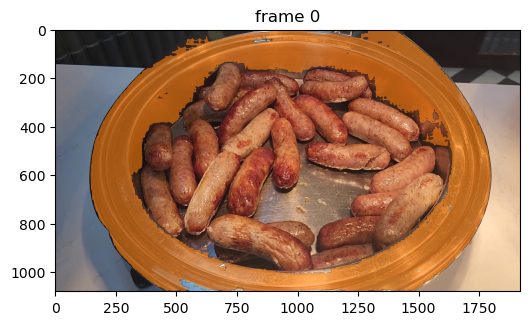

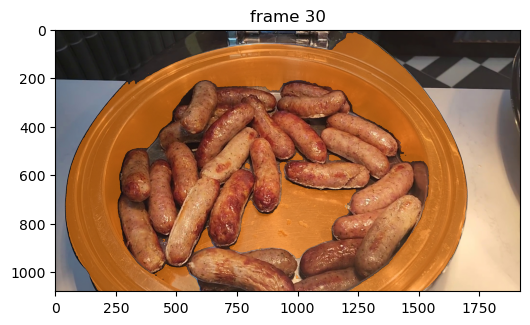

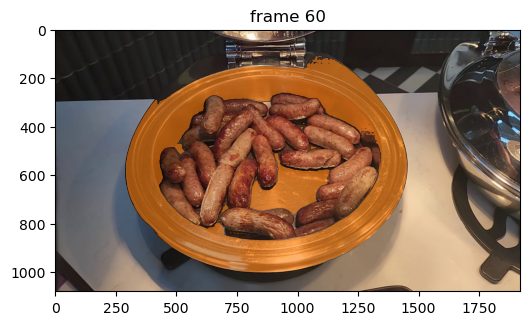

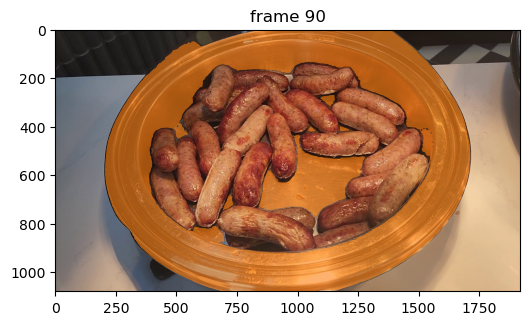

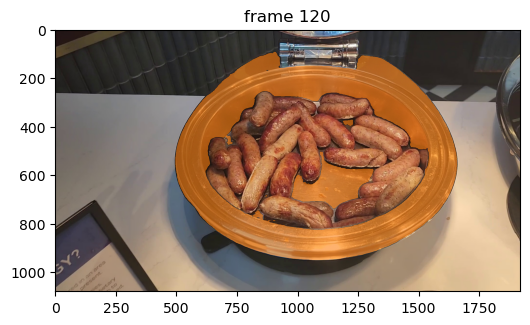

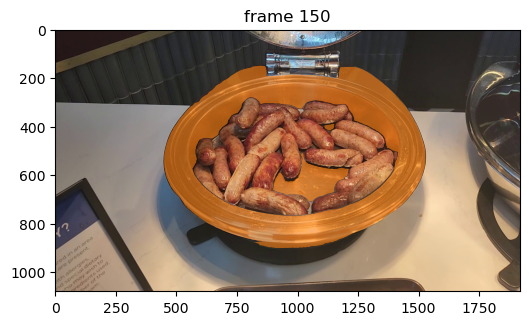

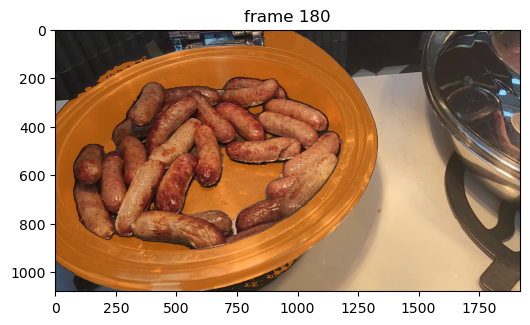

In [6]:
vid_processor.predict_video(vis_frame_stride=30)

In [9]:
## sam2 processor for images

In [1]:
from mb_llm.segsam2 import ImagePredictor

/home/malav/.local/lib/python3.11/site-packages/torch/cuda/__init__.py:128: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
img_processor = ImagePredictor('./sam2_hiera_s.yaml','/home/malav/Desktop/segment-anything-2/checkpoints/sam2_hiera_small.pt')

In [3]:
img_processor.set_image('./test_data/video_images/0_0005.jpg')

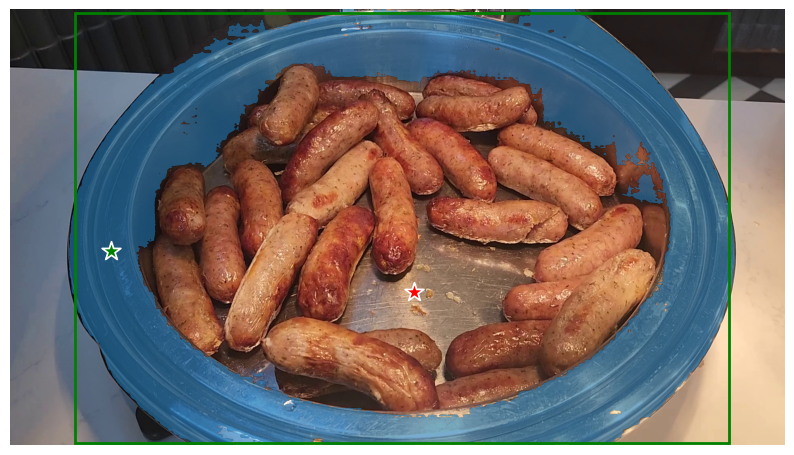

(array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32),
 array([0.83773583], dtype=float32),
 array([[[ -6.2497168,  -6.4802313,  -5.7469544, ...,  -6.7198386,
           -5.6009426,  -6.8816514],
         [ -8.648692 ,  -5.2109537,  -7.3971066, ...,  -5.2782683,
           -7.6765604,  -5.9941278],
         [ -6.123499 ,  -7.473436 ,  -5.750173 , ...,  -7.519608 ,
           -6.140819 ,  -7.1921196],
         ...,
         [-10.291089 ,  -7.8196054, -10.075117 , ...,  -8.089377 ,
          -11.464659 ,  -9.432155 ],
         [ -7.2337995,  -9.940547 ,  -7.9834023, ..., -10.301172 ,
           -8.454641 , -10.904646 ],
         [ -9.093437 ,  -7.0761585,  -9.06675  , ...,  -6.9070177,
           -8.972459 ,  -8.288068 ]]], dtype=float32))

In [ ]:
img_processor.predict_item(bbox=[10, 161, 1075, 1781],points=[[250, 600],[1000,700]],labels=[1,0]) ## RETURNS : MASKS, SCORES, LOGITS